<a href="https://colab.research.google.com/github/codm12112/SIT-PROJECT/blob/main/HousingDB_post2010.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('/content/HousingDB_post2010.csv')

In [4]:
print(df.head())
print(df.info())
print(df.describe())

   Job_Number    Job_Type    ResidFlag       NonresFlag  \
0   102133451  Alteration  Residential              NaN   
1   102138820  Alteration  Residential              NaN   
2   102151083  Alteration  Residential              NaN   
3   102284172  Alteration  Residential  Non-Residential   
4   102284804  Alteration  Residential              NaN   

                      Job_Status  CompltYear  PermitYear  ClassAInit  \
0  3. Permitted for Construction         NaN      2003.0         8.0   
1      5. Completed Construction      2012.0      2008.0         6.0   
2      5. Completed Construction      2011.0      2002.0         7.0   
3      5. Completed Construction      2016.0      2001.0         1.0   
4      5. Completed Construction      2022.0      2001.0         4.0   

   ClassAProp  ClassANet  ...  FireBattln  FireDivsn  PolicePcnt  PL_FIRM07  \
0           8        0.0  ...         1.0        1.0         1.0        NaN   
1          19       13.0  ...        11.0        3.0  

In [5]:
# Check for missing values
print(df.isnull().sum())

# Drop columns with too many missing values (threshold can be adjusted)
threshold = len(df) * 0.5
df_cleaned = df.dropna(thresh=threshold, axis=1)

# Fill missing values
for col in df_cleaned.select_dtypes(include='number').columns:
    df_cleaned[col] = df_cleaned[col].fillna(df_cleaned[col].median())

for col in df_cleaned.select_dtypes(include='object').columns:
    df_cleaned[col] = df_cleaned[col].fillna(df_cleaned[col].mode()[0])

# Check for duplicates
df_cleaned = df_cleaned.drop_duplicates()


Job_Number        0
Job_Type          0
ResidFlag         0
NonresFlag    46802
Job_Status        0
              ...  
Latitude          1
Longitude         1
GeomSource        1
DCPEdited     47836
Version           1
Length: 63, dtype: int64


/tmp/ipython-input-2751789747.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned[col] = df_cleaned[col].fillna(df_cleaned[col].median())
/tmp/ipython-input-2751789747.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned[col] = df_cleaned[col].fillna(df_cleaned[col].mode()[0])


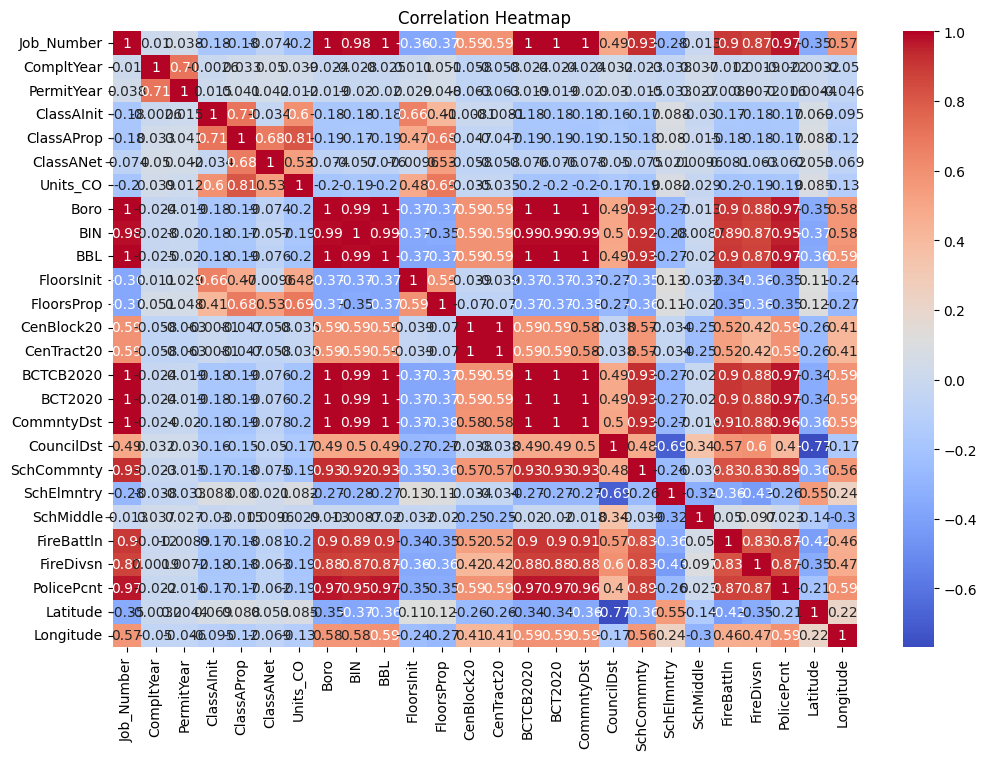

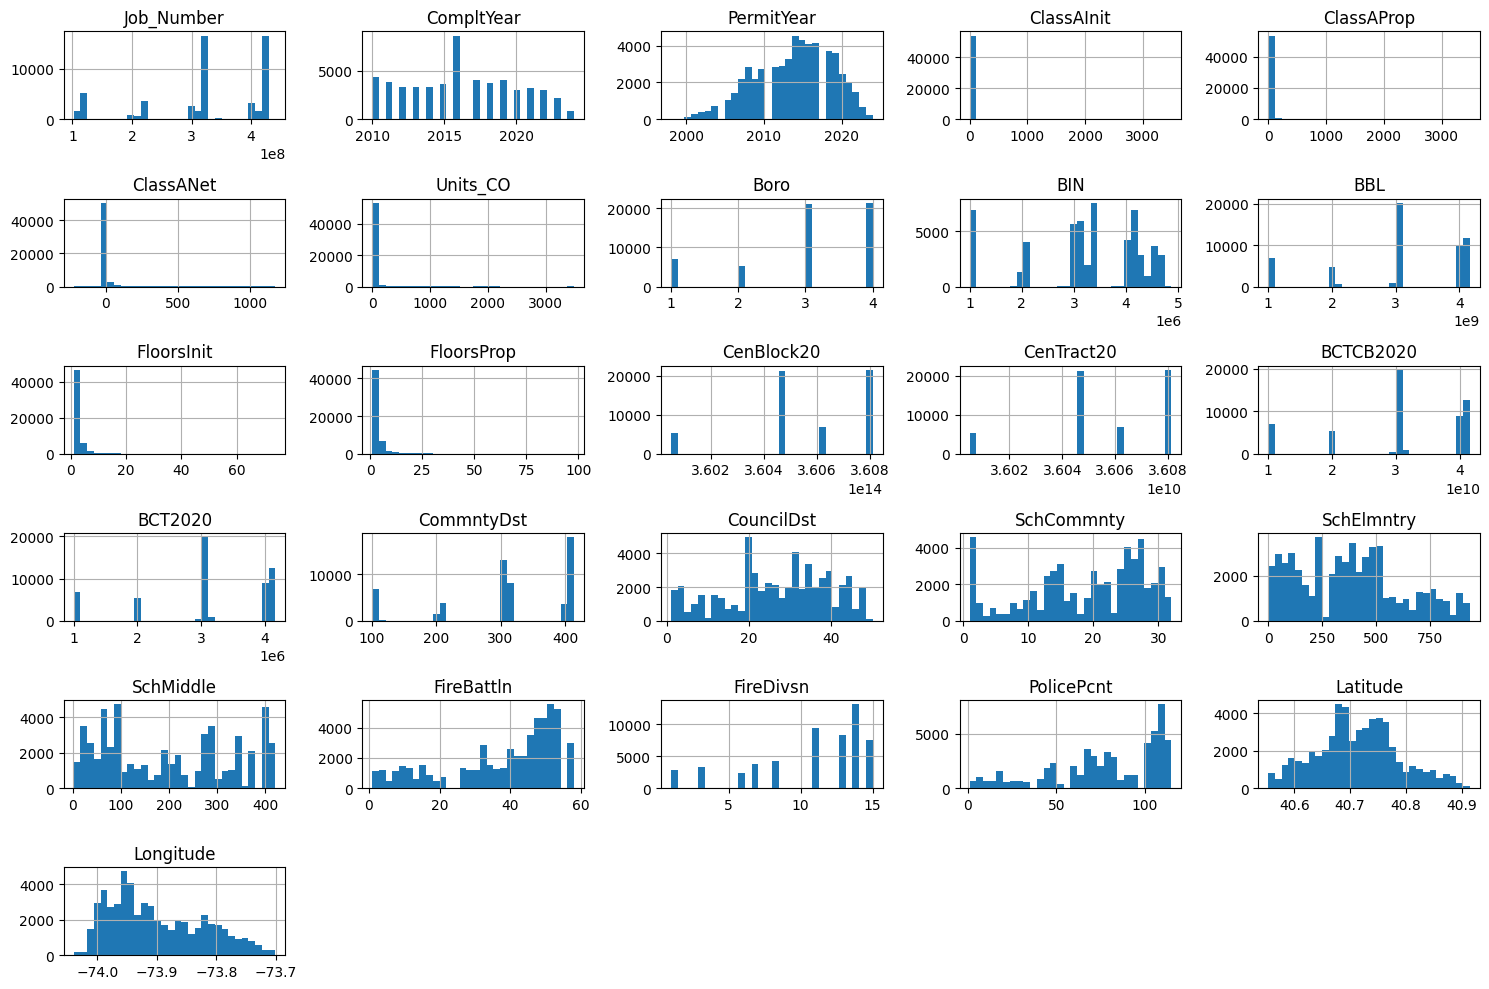

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

# Correlation heatmap
plt.figure(figsize=(12,8))
sns.heatmap(df_cleaned.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

# Histogram for numerical variables
df_cleaned.hist(bins=30, figsize=(15,10))
plt.tight_layout()
plt.show()

# Boxplots for price-related or area-related columns
if 'Sale Price' in df_cleaned.columns:
    plt.figure(figsize=(8,6))
    sns.boxplot(data=df_cleaned, y='Sale Price')
    plt.title("Sale Price Distribution")
    plt.show()

# Count plot for categorical variables (example: 'Borough')
if 'Borough' in df_cleaned.columns:
    plt.figure(figsize=(8,6))
    sns.countplot(data=df_cleaned, x='Borough', order=df_cleaned['Borough'].value_counts().index)
    plt.title("Count of Listings by Borough")
    plt.xticks(rotation=45)
    plt.show()


In [7]:
df_cleaned.to_csv('HousingDB_cleaned.csv', index=False)
